# Does faculty's tenure increase graduates employability?

### Fernando Greve <br> fgreve@gmail.com <br> www.fernandogreve.com

In [1]:
import os
import numpy as np
import pandas as pd
from openpyxl import load_workbook
import re
import stringcase
from unidecode import unidecode

import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

In [2]:
# docentes
path = os.path.join("data/", "indices_institucional_2005_2019.xlsx")

# Load workbook
wb = load_workbook(filename=path, read_only=True, data_only=True)

# Access to a worksheet
# wss = workbook.sheetnames
ws = wb['Docentes']

# Convert to DataFrame
docentes = pd.DataFrame(ws.values)
docentes.columns = docentes.iloc[0]
docentes = docentes.iloc[1:]

docentes = docentes[docentes["Año Proceso"] == 2019]

docentes["institucion"] = docentes["Nombre Institución"].str.replace('U.','UNIVERSIDAD')
docentes["institucion"] = docentes["institucion"].str.replace('C.F.T.','centro_de_formacion_tecnica')
docentes["institucion"] = docentes["institucion"].str.replace('I.P.','instituto_profesional')
docentes["institucion"] = docentes["institucion"].apply(stringcase.lowercase).apply(stringcase.snakecase).apply(unidecode)

docentes["sede"] = docentes["Sede"]
docentes["sede"] = docentes["sede"].apply(stringcase.lowercase).apply(stringcase.snakecase).apply(unidecode)

docentes.columns = docentes.columns.str.replace('°','_') #.apply(unidecode)

docentes.to_csv("docentes.csv", index = False)

In [3]:
# empleabilidad
path = os.path.join("data/", "Buscador-empleabilidad-e-ingresos_mifuturo_2020.xlsx")

# Load workbook
wb = load_workbook(filename=path, read_only=True, data_only=True)

# Access to a worksheet
ws = wb['Empleabilidad e Ingresos']

# Convert to DataFrame
empleabilidad = pd.DataFrame(ws.values)
empleabilidad.columns = empleabilidad.iloc[0]
empleabilidad = empleabilidad.iloc[1:]

empleabilidad["institucion"] = empleabilidad["Nombre de institución"].apply(stringcase.lowercase).apply(stringcase.snakecase).apply(unidecode)
empleabilidad["carrera"] = empleabilidad["Nombre carrera genérica"].apply(stringcase.lowercase).apply(stringcase.snakecase).apply(unidecode)

empleabilidad.columns = map(str.lower, empleabilidad.columns)
empleabilidad.columns = map(unidecode, empleabilidad.columns)
empleabilidad.columns = map(stringcase.snakecase, empleabilidad.columns)

empleabilidad.to_csv("empleabilidad.csv", index = False)

In [4]:
# indices
path = os.path.join("data", "ofertapregado2020.xlsx")

# Load workbook
wb = load_workbook(filename=path, read_only=True, data_only=True)

# Access to a worksheet
ws = wb['INDICES_Oferta2020Pregrado']

# Convert to DataFrame
indices = pd.DataFrame(ws.values)
indices.columns = indices.iloc[0]
indices = indices.iloc[1:]

indices["institucion"] = indices["Nombre Institución"].str.replace('U.','UNIVERSIDAD')
indices["institucion"] = indices["institucion"].str.replace('C.F.T.','centro_de_formacion_tecnica')
indices["institucion"] = indices["institucion"].str.replace('I.P.','instituto_profesional')
indices["institucion"] = indices["institucion"].apply(stringcase.lowercase).apply(stringcase.snakecase).apply(unidecode)

indices["carrera"] = indices["Carrera Genérica"].apply(stringcase.lowercase).apply(stringcase.snakecase).apply(unidecode)

indices["sede"] = indices["Nombre de la Sede"]
indices["sede"] = indices["sede"].apply(stringcase.lowercase).apply(stringcase.snakecase).apply(unidecode)

indices.columns = map(str.lower, indices.columns)
indices.columns = map(unidecode, indices.columns)
indices.columns = map(stringcase.snakecase, indices.columns)

indices.to_csv("indices.csv", index = False)

In [5]:
# docentes_2
docentes_2 = pd.merge(docentes, indices, how='left', on=["institucion", "sede"])
docentes_2.to_csv("docentes.csv", index = False)

In [6]:
# data
df = pd.merge(empleabilidad, docentes_2, how='left', on=["institucion", "carrera"])
df.to_csv("data.csv", index = False)

In [7]:
df.shape

(2774, 99)

In [8]:
df.head()

,codigo_ies,tipo_de_institucion,nombre_de_institucion,acreditacion_institucion__(datos_al_30_de_noviembre_2019),area,nombre_carrera_generica,nombre_carrera,%_titulados_con_continuidad_de_estudios,retencion_1er_ano,duracion_real_(semestres),...,cod__campus,cod__sede,titulo,grado_academico,valor_de_matricula,valor_de_arancel,valor_del_titulo,vacantes_(1),codgo_sies,pregrado/posgrado
0,1,Universidades,Universidad Gabriela Mistral,No,Administración y Comercio,Ingeniería Comercial,Ingeniería Comercial,0.0319149,s/i,13.9231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Universidades,Universidad Gabriela Mistral,No,Ciencias Sociales,Psicología,Psicología,0.0105263,s/i,13.3704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Universidades,Universidad Finis Terrae,4 años,Arte y Arquitectura,Arquitectura,Arquitectura,0,0.766234,s/i,...,1023001002,1023001,Arquitecto,Licenciado en Arquitectura,450000,5071000,450000,72,I2S1C3J1V1,Pregrado
3,2,Universidades,Universidad Finis Terrae,4 años,Arte y Arquitectura,Artes y Licenciatura en Artes,Artes Visuales,0.205882,0.814286,10.3333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Universidades,Universidad Finis Terrae,4 años,Arte y Arquitectura,Diseño,Diseño,0.0215054,0.876923,10.3077,...,1023001002,1023001,Diseñador,Licenciado en Diseño,462000,4815000,450000,60,I2S1C4J1V1,Pregrado


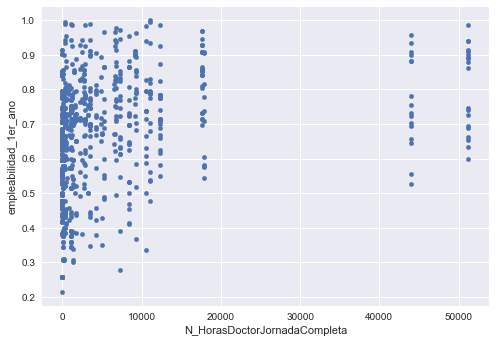

In [9]:
plt.style.use('seaborn')
df.plot(x='N_HorasDoctorJornadaCompleta', y='empleabilidad_1er_ano', kind='scatter')
plt.show()

In [10]:
df['N_HorasDoctorJornadaCompleta'] = df['N_HorasDoctorJornadaCompleta'].astype(float)
df["horas_phd_ln"] = np.log(df["N_HorasDoctorJornadaCompleta"])

df = df[df['horas_phd_ln'].notna()]

df["horas_phd_ln"].unique()

C:\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([ 7.70571282,  8.88889467,  4.47733681,  7.90433484,  3.55534806,
        4.18965474,  5.45103845,  5.24174702,  9.02809881,  5.98645201,
        4.90527478,  7.46737107,  5.83481074,  5.19295685,        -inf,
        4.8598124 ,  4.44265126,  4.31748811,  4.84418709,  5.5683445 ,
        4.36944785,  5.46806014,  7.03614849,  3.80666249,  9.41857331,
        7.95331835,  7.07749805,  7.20785987,  9.13873695,  7.30451595,
        8.8178902 ,  6.42648846,  7.00306546,  5.72031178,  8.15219802,
        5.56068163,  6.65672652,  8.36053938, 10.84406106,  9.77565418,
        9.31136149,  5.69373214,  8.80807015,  8.49023301,  8.77493139,
        8.51959032,  9.25874951,  8.16308638,  9.1372319 ,  7.47306909,
        5.86363118,  8.56959587,  6.34913899,  8.08886879,  7.3395377 ,
        7.92732436, 10.69103541,  8.16650032,  9.11778639,  5.3082677 ,
        5.65599181,  9.7880767 ,  8.81522156,  7.8272409 ,  8.88280805,
        3.73766962])

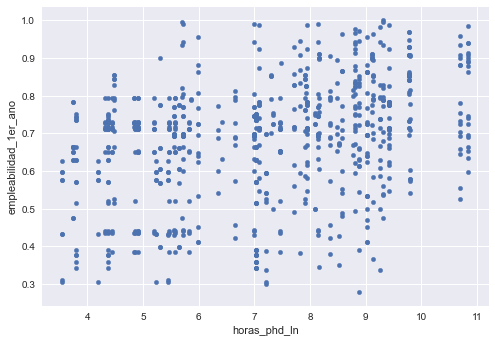

In [11]:
plt.style.use('seaborn')
df.plot(x='horas_phd_ln', y='empleabilidad_1er_ano', kind='scatter')
plt.show()

In [12]:
df['empleabilidad_1er_ano'] = df['empleabilidad_1er_ano'].astype(float)
df = df[df['empleabilidad_1er_ano'].notna()]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df['empleabilidad_1er_ano'] = df['empleabilidad_1er_ano'].astype(float)

results = smf.ols('empleabilidad_1er_ano ~ N_HorasDoctorJornadaCompleta', data=df).fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     empleabilidad_1er_ano   R-squared:                       0.069
Model:                               OLS   Adj. R-squared:                  0.068
Method:                    Least Squares   F-statistic:                     114.1
Date:                   Sun, 04 Oct 2020   Prob (F-statistic):           9.42e-26
Time:                           21:50:23   Log-Likelihood:                 796.11
No. Observations:                   1547   AIC:                            -1588.
Df Residuals:                       1545   BIC:                            -1578.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [14]:
results01 = smf.ols('empleabilidad_1er_ano ~ horas_phd_ln', data=df[df['N_HorasDoctorJornadaCompleta']>0]).fit()
print(results01.summary())

                              OLS Regression Results                             
Dep. Variable:     empleabilidad_1er_ano   R-squared:                       0.123
Model:                               OLS   Adj. R-squared:                  0.122
Method:                    Least Squares   F-statistic:                     113.2
Date:                   Sun, 04 Oct 2020   Prob (F-statistic):           7.84e-25
Time:                           21:50:23   Log-Likelihood:                 409.98
No. Observations:                    809   AIC:                            -816.0
Df Residuals:                        807   BIC:                            -806.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0

In [15]:
df['valor_de_arancel'] = df['valor_de_arancel'].astype(float)

results02 = smf.ols('empleabilidad_1er_ano ~ N_HorasDoctorJornadaCompleta + valor_de_arancel', data=df).fit()
print(results02.summary())

                              OLS Regression Results                             
Dep. Variable:     empleabilidad_1er_ano   R-squared:                       0.080
Model:                               OLS   Adj. R-squared:                  0.079
Method:                    Least Squares   F-statistic:                     67.30
Date:                   Sun, 04 Oct 2020   Prob (F-statistic):           9.43e-29
Time:                           21:50:23   Log-Likelihood:                 805.64
No. Observations:                   1547   AIC:                            -1605.
Df Residuals:                       1544   BIC:                            -1589.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [16]:
df["valor_de_arancel_ln"] = np.log(df["valor_de_arancel"])

results03 = smf.ols('empleabilidad_1er_ano ~ horas_phd_ln + valor_de_arancel_ln', data=df[df['N_HorasDoctorJornadaCompleta']>0]).fit()
print(results03.summary())

                              OLS Regression Results                             
Dep. Variable:     empleabilidad_1er_ano   R-squared:                       0.125
Model:                               OLS   Adj. R-squared:                  0.123
Method:                    Least Squares   F-statistic:                     57.40
Date:                   Sun, 04 Oct 2020   Prob (F-statistic):           4.93e-24
Time:                           21:50:23   Log-Likelihood:                 410.75
No. Observations:                    809   AIC:                            -815.5
Df Residuals:                        806   BIC:                            -801.4
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Inte

In [17]:
df["empleabilidad_1er_ano_ln"] = np.log(df["empleabilidad_1er_ano"])

cond1 = df['empleabilidad_1er_ano']>0
cond2 = df['valor_de_arancel']>0
cond3 = df['N_HorasDoctorJornadaCompleta']>0
cond = cond1 & cond2 & cond3

results04 = smf.ols('empleabilidad_1er_ano_ln ~ horas_phd_ln + valor_de_arancel_ln', data=df[cond]).fit()
print(results04.summary())

                               OLS Regression Results                               
Dep. Variable:     empleabilidad_1er_ano_ln   R-squared:                       0.108
Model:                                  OLS   Adj. R-squared:                  0.105
Method:                       Least Squares   F-statistic:                     48.64
Date:                      Sun, 04 Oct 2020   Prob (F-statistic):           1.14e-20
Time:                              21:50:23   Log-Likelihood:                -1.0905
No. Observations:                       809   AIC:                             8.181
Df Residuals:                           806   BIC:                             22.27
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [18]:
results05 = smf.ols('empleabilidad_1er_ano_ln ~ horas_phd_ln + valor_de_arancel_ln + C(nombre_de_institucion)', data=df[cond]).fit()
print(results05.summary())


                               OLS Regression Results                               
Dep. Variable:     empleabilidad_1er_ano_ln   R-squared:                       0.258
Model:                                  OLS   Adj. R-squared:                  0.227
Method:                       Least Squares   F-statistic:                     8.182
Date:                      Sun, 04 Oct 2020   Prob (F-statistic):           1.52e-32
Time:                              21:50:24   Log-Likelihood:                 73.736
No. Observations:                       809   AIC:                            -79.47
Df Residuals:                           775   BIC:                             80.19
Df Model:                                33                                         
Covariance Type:                  nonrobust                                         
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------

In [19]:
df['N_HorasProfJornadaHora'] = df['N_HorasProfJornadaHora'].astype(float)
df["horas_prof_ln"] = np.log(df["N_HorasProfJornadaHora"])

cond1 = df['empleabilidad_1er_ano']>0
cond2 = df['N_HorasDoctorJornadaCompleta']>0
cond3 = df['N_HorasProfJornadaHora']>0
cond = cond1 & cond2 & cond3

results06 = smf.ols('empleabilidad_1er_ano_ln ~ horas_phd_ln + horas_prof_ln', data=df[cond]).fit()
print(results06.summary())

                               OLS Regression Results                               
Dep. Variable:     empleabilidad_1er_ano_ln   R-squared:                       0.108
Model:                                  OLS   Adj. R-squared:                  0.105
Method:                       Least Squares   F-statistic:                     48.59
Date:                      Sun, 04 Oct 2020   Prob (F-statistic):           1.20e-20
Time:                              21:50:24   Log-Likelihood:               -0.93270
No. Observations:                       808   AIC:                             7.865
Df Residuals:                           805   BIC:                             21.95
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

C:\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
